In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/PhishingData.xlsx")

In [3]:
cols=['Result','SFH','Widnow','SSLfinal' ,'Request', 'Anchor',
       'Traffic','Length','Domain','IP',]
all_df=all_df[cols]

In [4]:
all_df[:2]

,Result,SFH,Widnow,SSLfinal,Request,Anchor,Traffic,Length,Domain,IP
0,0,1,-1,1,-1,-1,1,1,1,0
1,1,-1,-1,-1,-1,-1,0,1,1,1


In [5]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1353 train: 1072 test: 281


In [6]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [7]:
train_Features[:4]

array([[ 1, -1,  1, -1, -1,  1,  1,  1,  0],
       [-1, -1, -1, -1, -1,  0,  1,  1,  1],
       [ 1, -1,  0,  0, -1,  0, -1,  1,  0],
       [ 1,  0,  1, -1, -1,  0,  1,  1,  0]])

In [8]:
train_Label[:4]

array([0, 1, 1, 0])

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 164       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 964 samples, validate on 108 samples
Epoch 1/30
 - 2s - loss: 0.6819 - acc: 0.0757 - val_loss: 0.6655 - val_acc: 0.0926
Epoch 2/30
 - 0s - loss: 0.6362 - acc: 0.0757 - val_loss: 0.5853 - val_acc: 0.0926
Epoch 3/30
 - 0s - loss: 0.4963 - acc: 0.1017 - val_loss: 0.3629 - val_acc: 0.2500
Epoch 4/30
 - 0s - loss: 0.1694 - acc: 0.2770 - val_loss: -7.7994e-02 - val_acc: 0.2963
Epoch 5/30
 - 0s - loss: -3.8438e-01 - acc: 0.3288 - val_loss: -7.3836e-01 - val_acc: 0.3148
Epoch 6/30
 - 0s - loss: -1.1769e+00 - acc: 0.3382 - val_loss: -1.6823e+00 - val_acc: 0.3333
Epoch 7/30
 - 0s - loss: -2.3170e+00 - acc: 0.3465 - val_loss: -3.0416e+00 - val_acc: 0.3241
Epoch 8/30
 - 0s - loss: -3.8691e+00 - acc: 0.3475 - val_loss: -4.6518e+00 - val_acc: 0.3241
Epoch 9/30
 - 0s - loss: -5.1098e+00 - acc: 0.3465 - val_loss: -5.3641e+00 - val_acc: 0.3333
Epoch 10/30
 - 0s - loss: -5.6210e+00 - acc: 0.3506 - val_loss: -5.7836e+00 - val_acc: 0.3519
Epoch 11/30
 - 0s - loss: -5.9021e+00 - acc: 0.3527 - val_

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

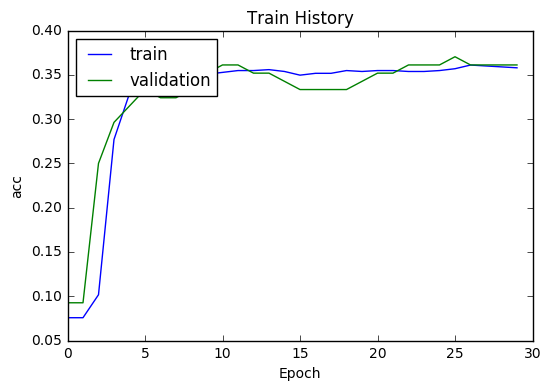

In [18]:
show_train_history(train_history,'acc','val_acc')

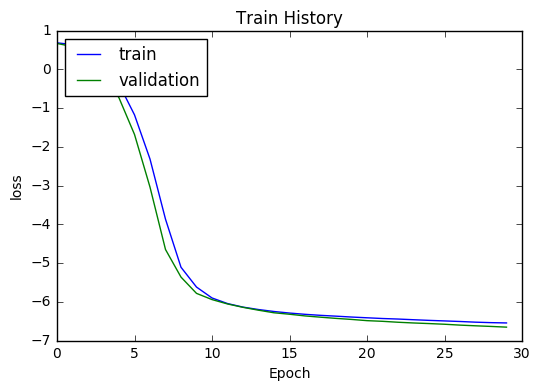

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

281/281 [==============================] - 0s 56us/step


In [21]:
scores[1]

0.31316725989253497